# Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [2]:
#reading Dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print("train:", train.shape)
print('test:', test.shape)

train: (191, 13)
test: (48, 13)


# Analisi e pulizia Dataset

In [3]:
train

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,60.0,0,96,1,38,0,228000.00,0.75,140,0,0,95
1,0,68.0,1,157,1,60,0,208000.00,1.00,140,0,0,237
2,1,68.0,1,577,0,25,1,166000.00,1.00,138,1,0,43
3,0,50.0,0,2522,0,30,1,404000.00,0.50,139,0,0,214
4,0,53.0,0,56,0,50,0,308000.00,0.70,135,1,1,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,73.0,1,231,1,30,0,160000.00,1.18,142,1,1,180
187,0,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107
188,0,46.0,1,291,0,35,0,348000.00,0.90,140,0,0,109
189,0,55.0,0,835,0,40,0,279000.00,0.70,140,1,1,147


In [4]:
# Analyzing DTypes of train and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               191 non-null    int64  
 1   age                       191 non-null    float64
 2   anaemia                   191 non-null    int64  
 3   creatinine_phosphokinase  191 non-null    int64  
 4   diabetes                  191 non-null    int64  
 5   ejection_fraction         191 non-null    int64  
 6   high_blood_pressure       191 non-null    int64  
 7   platelets                 191 non-null    float64
 8   serum_creatinine          191 non-null    float64
 9   serum_sodium              191 non-null    int64  
 10  sex                       191 non-null    int64  
 11  smoking                   191 non-null    int64  
 12  time                      191 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 19.5 KB


In [5]:
# checking if there are null values
train.isnull().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [6]:
test.isnull().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [7]:
# checking if there are NaN values
train.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [8]:
test.isna().sum()

DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

Dunque non sono presenti valori nulli

In [9]:
train.describe().round(2)

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00
mean,0.30,61.76,0.42,580.56,0.40,37.80,0.38,257237.54,1.41,136.47,0.65,0.32,130.19
std,0.46,12.31,0.49,1000.31,0.49,11.32,0.49,87310.44,1.06,4.56,0.48,0.47,76.68
min,0.00,40.00,0.00,23.00,0.00,15.00,0.00,47000.00,0.50,113.00,0.00,0.00,4.00
25%,0.00,53.00,0.00,109.50,0.00,30.00,0.00,210500.00,0.90,134.00,0.00,0.00,73.50
50%,0.00,60.00,0.00,233.00,0.00,38.00,0.00,262000.00,1.10,137.00,1.00,0.00,115.00
75%,1.00,70.00,1.00,582.00,1.00,45.00,1.00,302500.00,1.40,139.00,1.00,1.00,200.50
max,1.00,95.00,1.00,7861.00,1.00,70.00,1.00,533000.00,9.00,146.00,1.00,1.00,285.00


In [10]:
test.describe().round(2)

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00,48.00
mean,0.27,58.27,0.50,563.25,0.44,40.10,0.25,283078.96,1.28,136.23,0.60,0.29,140.67
std,0.45,10.33,0.51,703.84,0.50,12.84,0.44,116798.68,0.65,3.96,0.49,0.46,85.03
min,0.00,40.00,0.00,54.00,0.00,20.00,0.00,130000.00,0.70,125.00,0.00,0.00,10.00
25%,0.00,50.00,0.00,128.75,0.00,33.75,0.00,218500.00,0.90,134.00,0.00,0.00,75.00
50%,0.00,60.00,0.50,316.50,0.00,38.00,0.00,263358.03,1.05,137.00,1.00,0.00,137.00
75%,1.00,65.00,1.00,583.50,1.00,42.50,0.25,305000.00,1.40,140.00,1.00,1.00,216.25
max,1.00,80.00,1.00,3966.00,1.00,80.00,1.00,742000.00,3.70,142.00,1.00,1.00,278.00


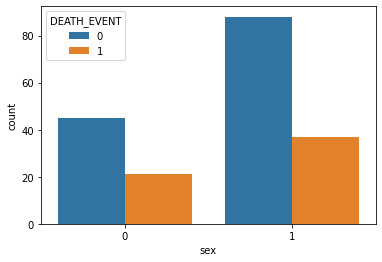

In [11]:
ax = sns.countplot(x="sex", hue="DEATH_EVENT", data=train)

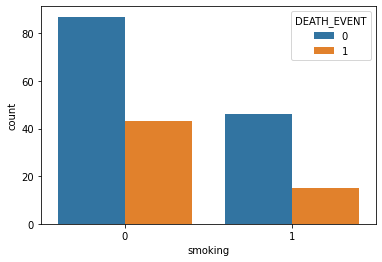

In [12]:
ax = sns.countplot(x="smoking", hue="DEATH_EVENT", data=train)

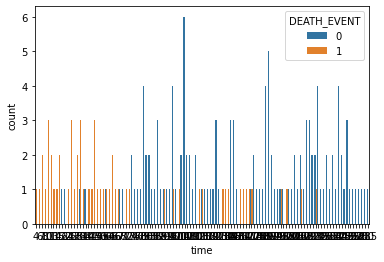

In [13]:
ax = sns.countplot(x="time", hue="DEATH_EVENT", data=train)

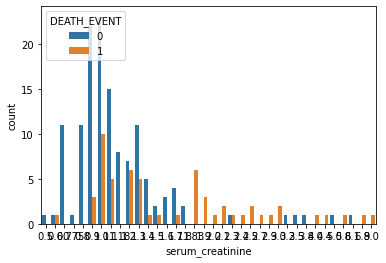

In [14]:
ax = sns.countplot(x="serum_creatinine", hue="DEATH_EVENT", data=train)

# Encoding

In [15]:
target_col = ["DEATH_EVENT"]
drop_cols = [ 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
       'high_blood_pressure', 'platelets', 'serum_sodium', 'sex',
       'smoking']
cat_cols = train.nunique()[train.nunique() <= 5].keys().tolist()
num_cols = [c for c in train.columns if c not in target_col + drop_cols + cat_cols]

In [16]:
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

y_train = train[target_col]
y_test = test[target_col]
x_train = train.loc[:, train.columns != "DEATH_EVENT"]
x_test = test.loc[:, test.columns != "DEATH_EVENT"]

print("train", train.shape)
print("test", test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
print("x_train", x_train.shape)
print("x_test", x_test.shape)

train (191, 5)
test (48, 5)
y_train (191, 1)
y_test (48, 1)
x_train (191, 4)
x_test (48, 4)


In [17]:
x_train

,age,ejection_fraction,serum_creatinine,time
0,60.0,38,0.75,95
1,68.0,60,1.00,237
2,68.0,25,1.00,43
3,50.0,30,0.50,214
4,53.0,50,0.70,231
...,...,...,...,...
186,73.0,30,1.18,180
187,60.0,45,6.10,107
188,46.0,35,0.90,109
189,55.0,40,0.70,147


In [19]:
# Viene fatta una codifica della age raggruppandola in 3 livlli di età
def codifica_eta(data):
    data= data.copy()
    age = np.asanyarray(data["age"])
    for i in range(0, age.size):
        if 40 <= age[i] <= 45:
            age[i] = 0
        elif 54 <= age[i] <= 78:
            age[i] = 1
        else:
            age[i] = 2
        
            
    data["age"] = pd.DataFrame(age)
    return data

x_train =codifica_eta(x_train)
x_test = codifica_eta(x_test)

x_train['time'] = pd.cut(x_train['time'], bins=4, labels=np.arange(4), right=False)
x_test['time'] = pd.cut(x_test['time'], bins=4, labels=np.arange(4), right=False)

x_train['ejection_fraction'] = pd.cut(x_train['ejection_fraction'], bins=4, labels=np.arange(4), right=False)
x_test['ejection_fraction'] = pd.cut(x_test['ejection_fraction'], bins=4, labels=np.arange(4), right=False)

# Confronto tra diversi modelli

In [20]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression( random_state=0)
logreg.fit(x_train, y_train.values.ravel())
print("Accuracy on training set: {:.2f}".format(logreg.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(logreg.score(x_test, y_test)))

Accuracy on training set: 0.86
Accuracy on test set: 0.83


In [21]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
rfc.fit(x_train, y_train.values.ravel())
print("Accuracy on training set: {:.2f}".format(rfc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rfc.score(x_test, y_test)))

Accuracy on training set: 0.96
Accuracy on test set: 0.79


In [22]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_leaf_nodes=10, random_state=30, criterion='entropy')
dtc.fit(x_train, y_train.values.ravel())
print("Accuracy on training set: {:.2f}".format(dtc.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(dtc.score(x_test, y_test)))

Accuracy on training set: 0.92
Accuracy on test set: 0.81
